# AAM-IPL Week-<No> Project - <Topic Name> - <Project Name>
**Name of The Student**: <Student_Name> </br>
**Roll No.**: <Student-Roll_Number>> </br>
**Branch of Study**: <Student_Name> </br>
**Department**: <Student_department> </br>
**Semester**: <Student_Name> </br>
**Email**: <GPREC_Email_Address> </br>
**Guest Faculty and Instructor**: Venkateswar Reddy Melachervu, CTO, Brillium Technologies </br>
**Program Coordinator**: Prof. V.Suresh, CSM, GPREC </br>

**Project Implementation Details**: </br>
<Project_Implementation_Details>


**AAM-IPL of GPREC is brought to you by Brillium Technologies.**

In [2]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Create GPREC AAM-IPL logo watermark function
gprec_aam_ipl_logo = 'AAM-IPL-Header-6.png'
logo_img = mpimg.imread(gprec_aam_ipl_logo)

def add_watermark_AAM_IPL_logo(ax, logo_img):
    """Function to add a single, centered diagonal logo on the plot."""
    zoom = 0.6
    imagebox = OffsetImage(logo_img, zoom=zoom, alpha=0.25)
    ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction', box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

# Load Boston Housing dataset
print('Boston Housing Prices Prediction Model')
print('Loading the data and displaying the first five rows...')
boston_housing_data = 'BostonHousing.csv'
df_boston_housing = pd.read_csv(boston_housing_data)

# Print the total number of rows in the dataset
total_rows = df_boston_housing.shape[0]
print('Total data points/rows in the data set:', total_rows)

# Print the names of the columns in the data set
# Define the column names and descriptions
print('Columns in the data set:')
column_info = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq. ft.',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'Nitric oxide concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to five Boston employment centers',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property tax rate per $10,000',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town',
    'LSTAT': 'Percentage of lower-status population',
    'MEDV': 'Median value of owner-occupied homes in $1000s (target variable)'
}
for column, description in column_info.items():
    print(f"{column:<10} {description}")
print('First five rows of Boston Housing Data...')
# Print first few rows
print(df_boston_housing.head())

# 1. Data Preprocessing
# Checking for missing values and displaying only columns with missing values (without the dtype)
missing_values = df_boston_housing.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only display columns with missing values
if len(missing_values) > 0:
    print("Columns with missing values:")
    print(missing_values.to_string(header=False))
else:
    print("No missing values found in the Boston Housing Dataset.")
print()

# Drop rows with missing data (if necessary)
df_boston_housing = df_boston_housing.dropna()

Boston Housing Prices Prediction Model
Loading the data and displaying the first five rows...
Total data points/rows in the data set: 506
Columns in the data set:
CRIM       Per capita crime rate by town
ZN         Proportion of residential land zoned for lots over 25,000 sq. ft.
INDUS      Proportion of non-retail business acres per town
CHAS       Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX        Nitric oxide concentration (parts per 10 million)
RM         Average number of rooms per dwelling
AGE        Proportion of owner-occupied units built prior to 1940
DIS        Weighted distances to five Boston employment centers
RAD        Index of accessibility to radial highways
TAX        Full-value property tax rate per $10,000
PTRATIO    Pupil-teacher ratio by town
B          1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town
LSTAT      Percentage of lower-status population
MEDV       Median value of owner-occupied homes in $1000s (target

Plotting histograms of all independent columns/features...


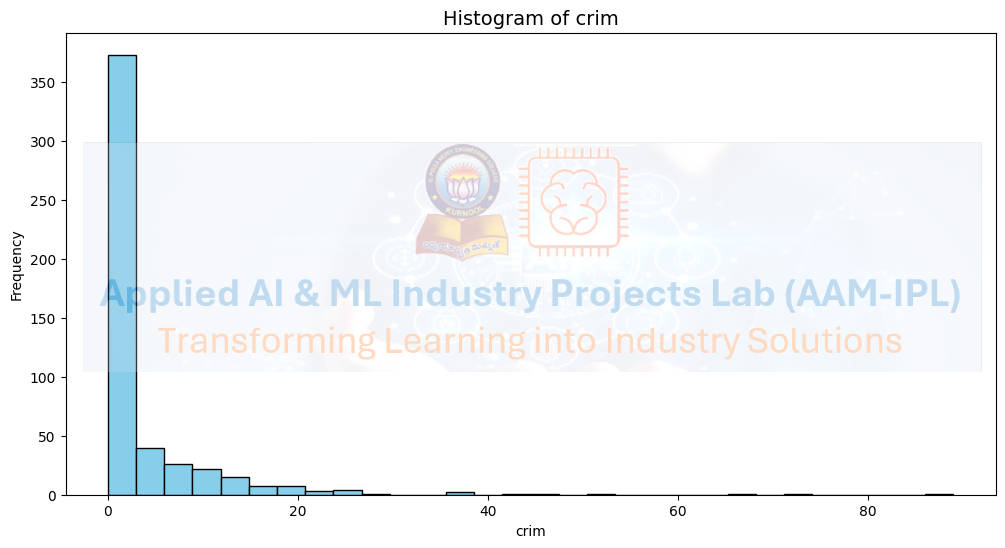

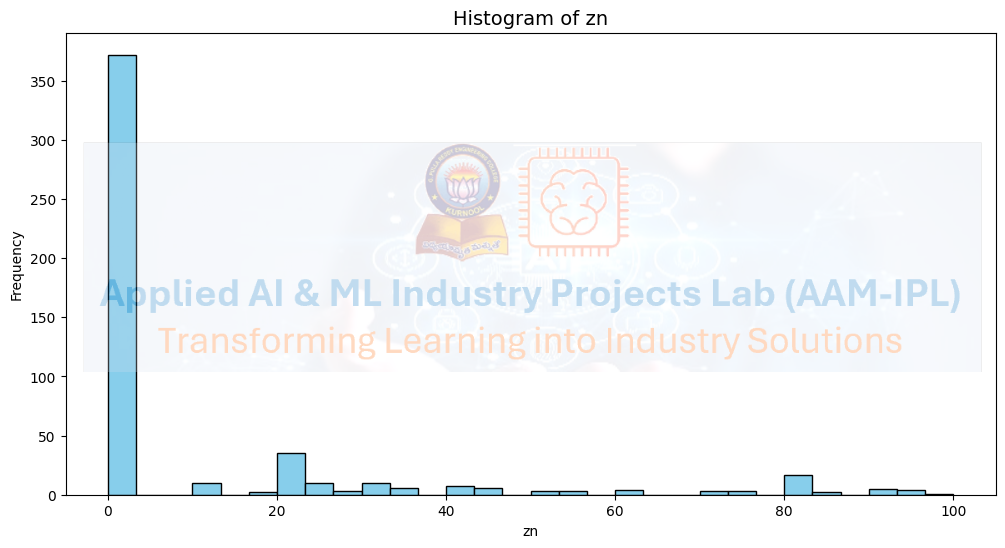

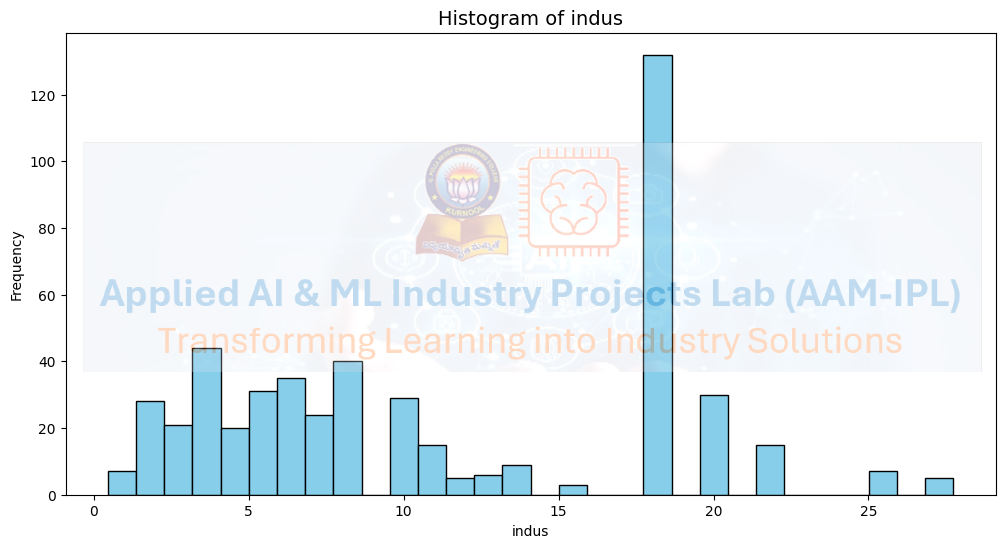

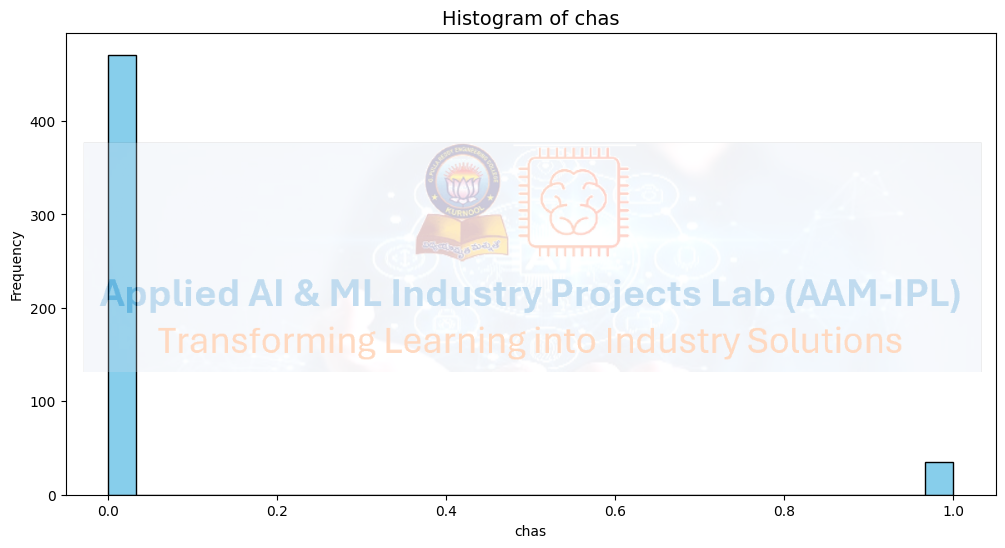

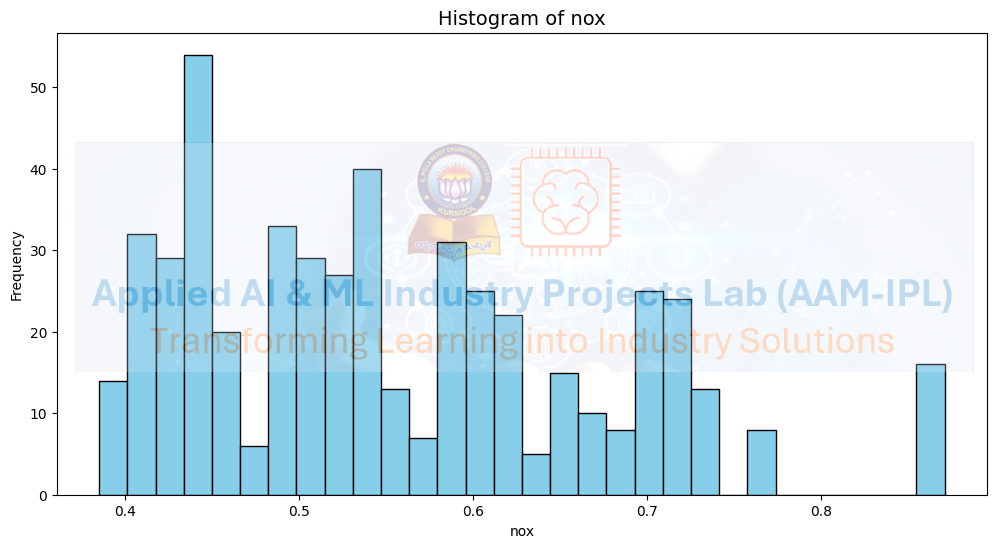

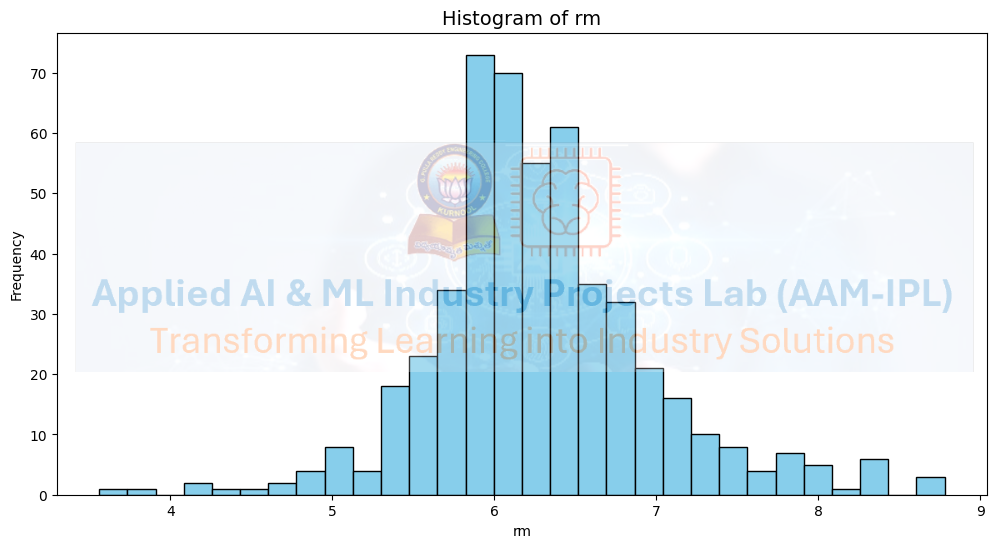

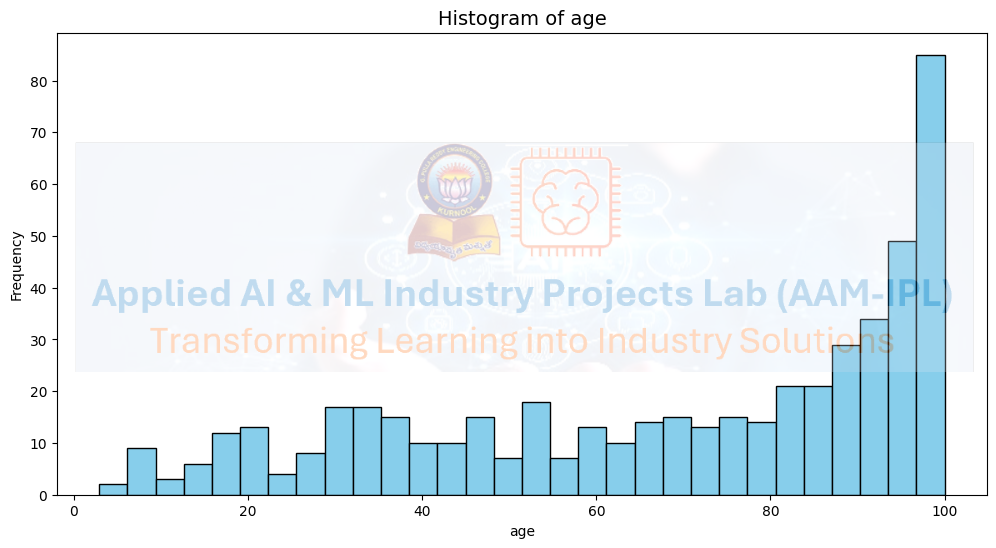

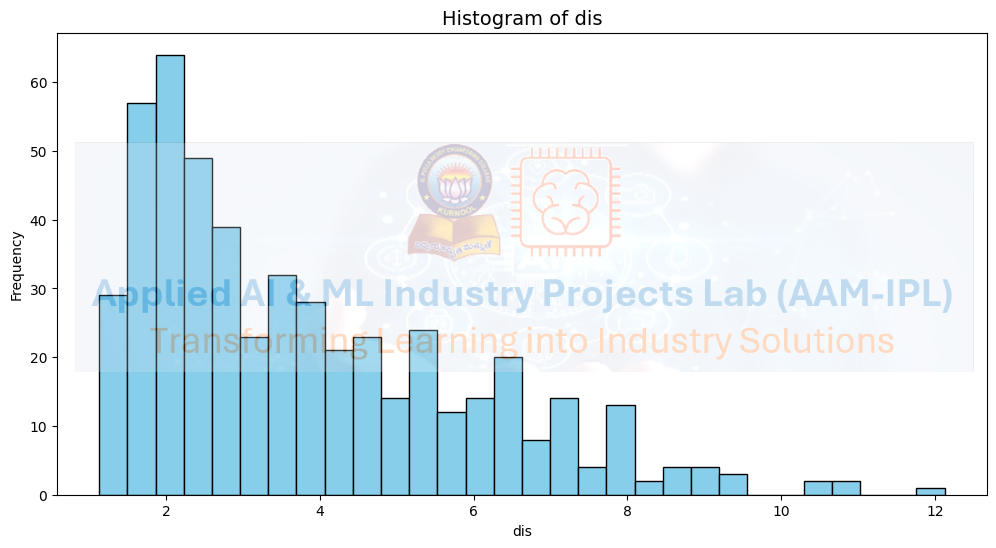

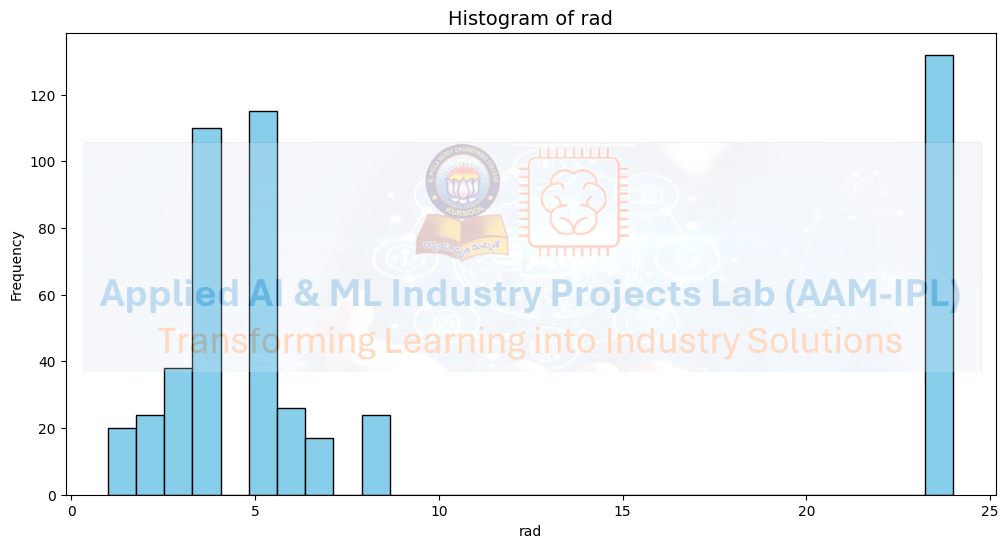

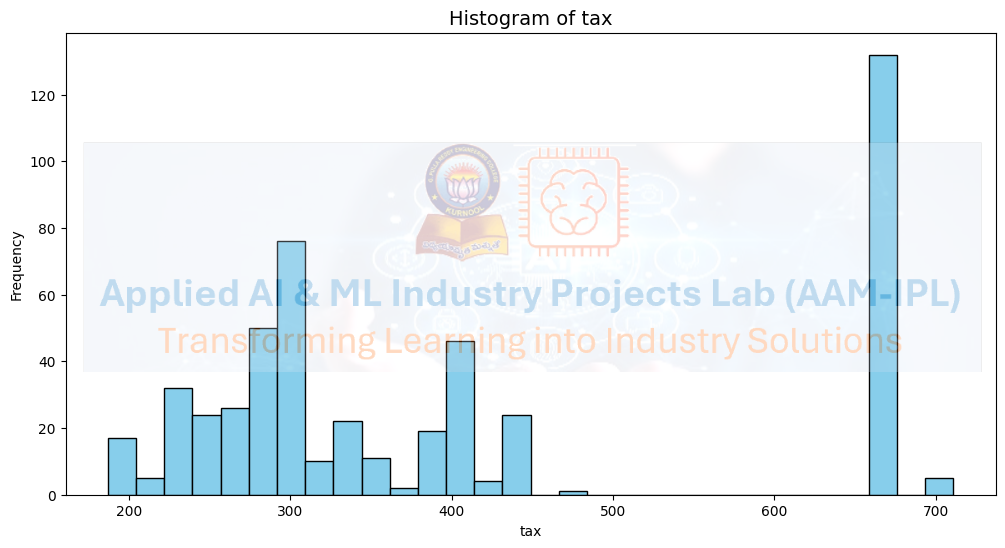

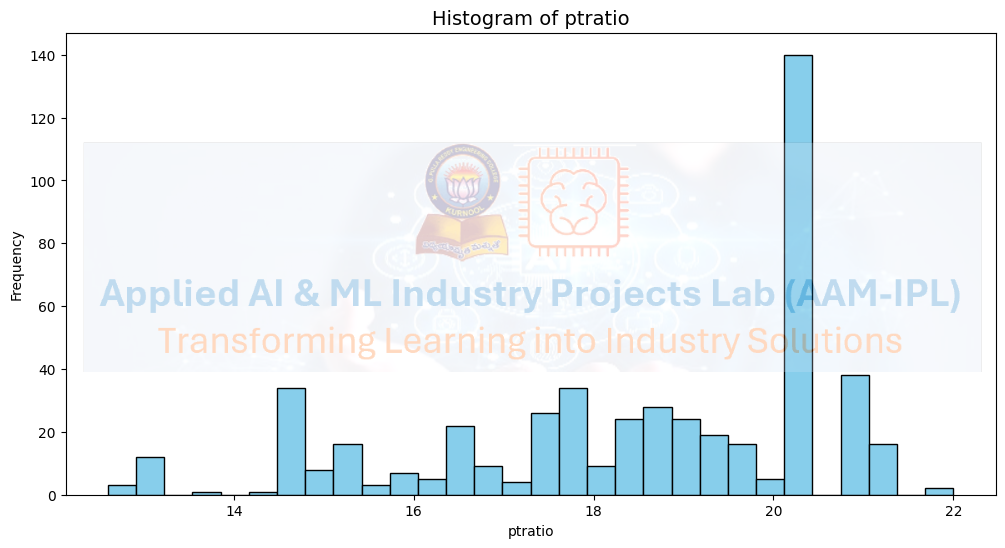

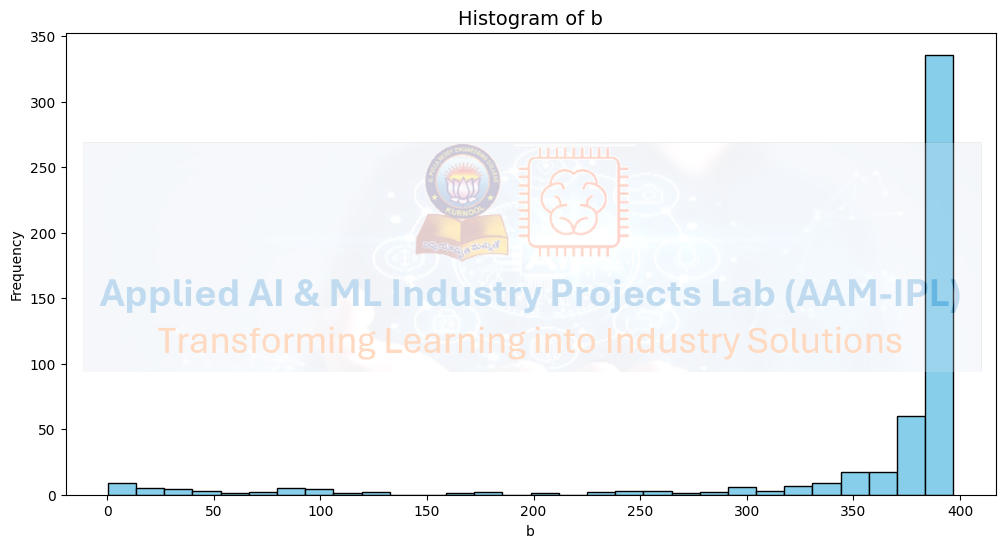

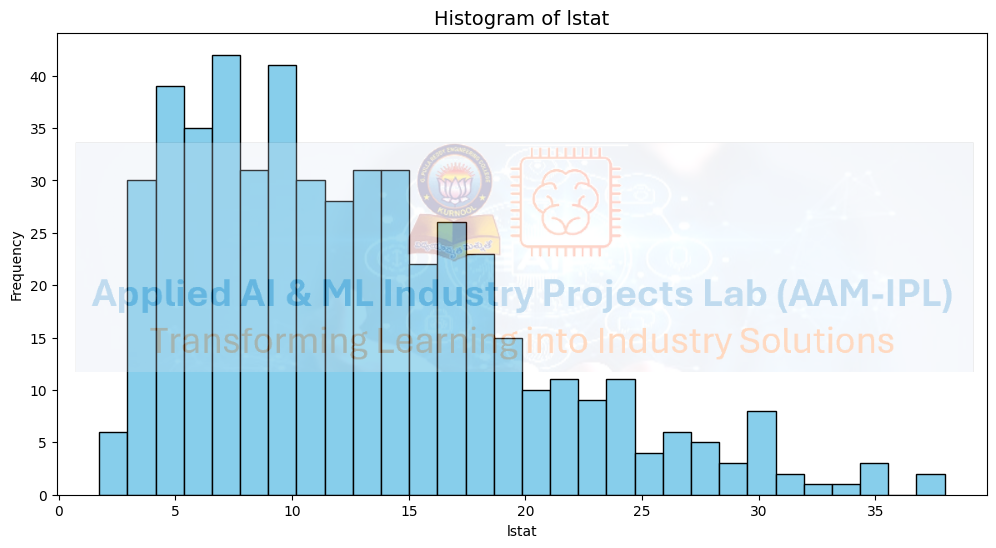

In [3]:
# Exploratory data analysis

# Set figure size for all plots
figsize = (12, 6)
print('Plotting histograms of all independent columns/features...')

# Function to plot histograms of all independent columns
def plot_histograms_with_watermark(df, independent_columns):
    for col in independent_columns:
        fig, ax = plt.subplots(figsize=figsize)
        ax.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        ax.set_title(f'Histogram of {col}', fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

        # Add watermark
        add_watermark_AAM_IPL_logo(ax, logo_img)

        # Show the plot
        plt.show()

# Get the list of independent columns (excluding the target 'MEDV')
independent_columns = df_boston_housing.columns[:-1]  # All columns except the last (target variable)

# Plot the histograms with the watermark for all independent columns
plot_histograms_with_watermark(df_boston_housing, independent_columns)

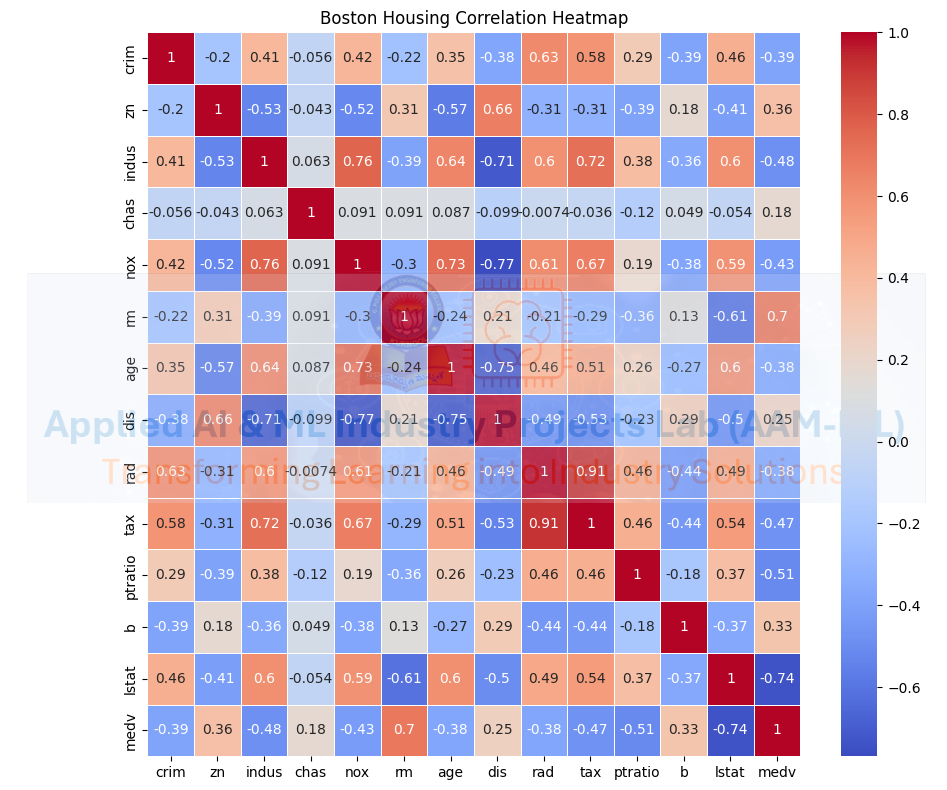

In [4]:
# Plot correlation heatmap of features

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Assuming df_boston_housing contains your dataset

# Compute the correlation matrix
corr_matrix = df_boston_housing.corr()

# Create a figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title("Boston Housing Correlation Heatmap")

# Add watermark
ax = plt.gca()
watermark = plt.imread('AAM-IPL-Header-6.png')

# Position the watermark diagonally
imagebox = OffsetImage(watermark, alpha=0.2, zoom=0.6)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction', frameon=False, 
                    boxcoords="axes fraction", box_alignment=(0.5, 0.5), 
                    transform=ax.transData)

ax.add_artist(ab)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
# Train and build the linear regression model

# Select features (all columns except the last one, assuming it's the target)
X = df_boston_housing.iloc[:, :-1]
# Select target (MEDV: Median value of owner-occupied homes in $1000s)
y = df_boston_housing.iloc[:, -1]
# Standardize the features
print('Standardising the data...')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
print('Splitting the data and training the model...')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
print('Predicting the test set...')
y_pred = model.predict(X_test)
print('Predicted the test set')

Standardising the data...
Splitting the data and training the model...
Predicting the test set...
Predicted the test set


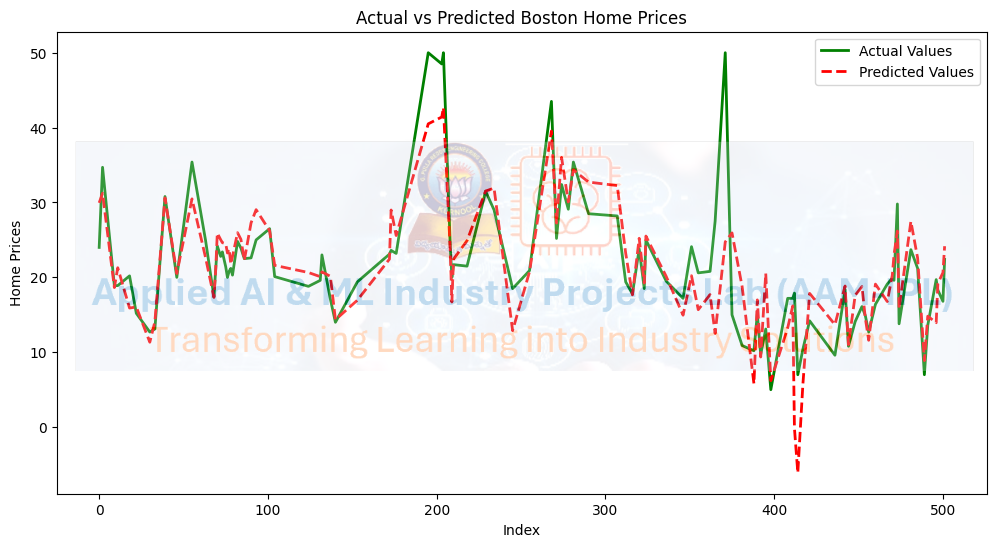

In [6]:
# Plot Actual Vs Predicted Home Prices

# Sort the actual and predicted values by index to make the lines smooth
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()

# Plot actual vs predicted values as smooth lines with green and red colors
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label='Actual Values', color='green', linewidth=2)
plt.plot(y_pred_sorted, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Home Prices')
plt.title('Actual vs Predicted Boston Home Prices')
plt.legend()

# Add watermark (assuming the watermark function and logo image are available)
gprec_aam_ipl_logo = 'AAM-IPL-Header-6.png'
logo_img = mpimg.imread(gprec_aam_ipl_logo)
def add_watermark_AAM_IPL_logo(ax, logo_img):
    zoom = 0.6
    imagebox = OffsetImage(logo_img, zoom=zoom, alpha=0.25)
    ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction', box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

# Get the current axis and add watermark
ax = plt.gca()
add_watermark_AAM_IPL_logo(ax, logo_img)

# Show the plot
plt.show()

In [7]:
# Evaluate Model Performance

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = (abs((y_test - y_pred) / y_test)).mean() * 100
# Print the results
print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R² Score: 0.6687594935356318
Mean Squared Error (MSE): 24.291119474973527
Root Mean Squared Error (RMSE): 4.928602182665338
Mean Absolute Error (MAE): 3.1890919658878505
Mean Absolute Percentage Error (MAPE): 16.87%


In [8]:
# Print coefficients of the linear model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Regression Coefficients of the Model')
print(coefficients)

Regression Coefficients of the Model
         Coefficient
crim       -0.971494
zn          0.701556
indus       0.276752
chas        0.706532
nox        -1.991430
rm          3.115718
age        -0.177060
dis        -3.045771
rad         2.282785
tax        -1.792605
ptratio    -1.979954
b           1.126499
lstat      -3.628149


In [2]:
# Generate the PDF of code and output of project jupyter file
!jupyter nbconvert --to pdf AAM-IPL-Wk-3-LinearReg-Boston-Housing-Fulll-Code-V3.ipynb

: 